In [ ]:
"""
Fish-quant data analysis and visualization via python

Title: Using single-molecule fluorescence microscopy to uncover neuronal vulnerability to protein damage

Maria Vera Ugalde Lab, 
Department of Biochemistry and Center de Recherche en Biologie Structurale, 
McGill University, Montreal, QC H3G 1Y6, Canada.
"""

In [21]:
## Importing the libraries

import pandas as pd               # importing pandas to access data from excel file
import matplotlib.pyplot as plt   # importing matlab plotting functionalities library
import seaborn as sns             # importing seaborn, a python data visualization library based on Matplotlib
import numpy as np                # numpy array


# Please remember to change the folder name, designation and file name as you have saved in your computer!
# While using Jupyter notebooks, always execute this cell first followed by other cells.

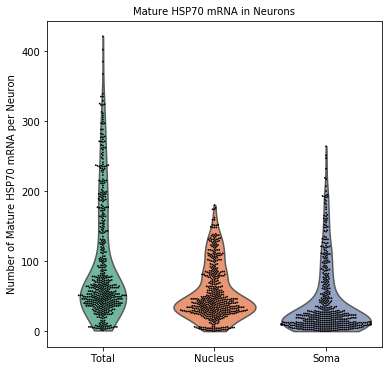

In [22]:
# Result image 1 is a violin plot for Mature HSP70 mRNA in different parts of neurons

# Load the excel sheet with data from the designated folder
# Use row 5 as header, use columns 2,3 and 7 and exporting 2 excel sheets with data
data1= pd.read_excel("__FQ_batch_summary_ALL_200728.xlsx", sheet_name = 0, header=5, usecols=[2,3,7])
data2= pd.read_excel("__FQ_batch_summary_ALL_190925 Control nascent and mature.xlsx", sheet_name = 0, header=5,usecols=[2,3,7])

# Concatinating the data in 2 excel sheets 
data=pd.concat([data1,data2])
#print(data)

# Setting up figure size
fig, ax = plt.subplots(figsize=(6,6))

# Making a violin plot and swarm plot with the selected data i.e., columns 2,3 and 7.
ax=sns.violinplot(data=data, inner=None, palette="Set2", cut=0)
ax=sns.swarmplot(data=data, size=1.8, color="black")

# Setting up the title and y-label
ax.set_title("Mature HSP70 mRNA in Neurons", fontsize=10)
plt.ylabel("Number of Mature HSP70 mRNA per Neuron", fontsize=10)

# Setting x-y tick labels 
ax.set_xticklabels(['Total', 'Nucleus', 'Soma'], fontsize=10)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)
    
# Figure visualization and storage
plt.savefig("F1_Mature HSP70 mRNA in Neurons.png", dpi=600, bbox_inches = 'tight')
plt.show()

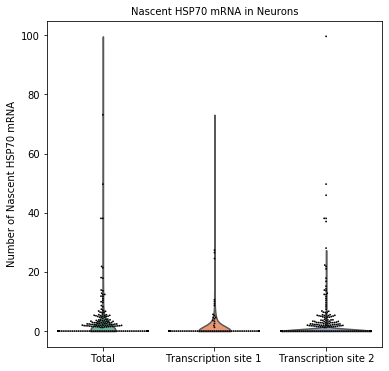

In [23]:
# Result image 2 is a violin plot for Nascent HSP70 mRNA in different parts of neurons

# Load the excel sheet with data from the designated folder
# Use row 5 as header, use columns 4,5 and 6 and exporting 2 excel sheets with data
data1= pd.read_excel("__FQ_batch_summary_ALL_200728.xlsx", sheet_name = 0, header=5, usecols=[4,5,6])
data2= pd.read_excel("__FQ_batch_summary_ALL_190925 Control nascent and mature.xlsx", sheet_name = 0, header=5,usecols=[4,5,6])

# Concatinating the data in 2 excel sheets of selected columns of 4, 5, 6
data=pd.concat([data1,data2])
#print(data)

# Assigning a figure size 
fig, ax = plt.subplots(figsize=(6,6))

# Making a violin plot with the selected data i.e., columns 4, 5, 6.
ax=sns.violinplot(data=data, order=['TS_Total', 'TS1_Nascent', 'TS2_Nascent'], inner=None, palette="Set2", cut=0)
ax=sns.swarmplot(data=data, size=1.8, color="black")

# Setting the title, y-axis label
ax.set_title("Nascent HSP70 mRNA in Neurons", fontsize=10)
plt.ylabel("Number of Nascent HSP70 mRNA", fontsize=10)

# Setting the x-y ticklabels
ax.set_xticklabels(['Total', 'Transcription site 1 ', 'Transcription site 2'], fontsize=10)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(10) 
    
# Saving the plot in the provided name and image quality
plt.savefig("F2_Nascent HSP70 mRNA in neurons.png", dpi=600, bbox_inches = 'tight')
plt.show()

    TS1_Nascent  TS2_Nascent  TS_Total
0       0.00000       0.0000   0.00000
1       0.00000       0.0000   0.00000
2       0.00000       0.0000   0.00000
3       1.65207       1.2753   2.92737
4       1.99236       0.0000   1.99236
..          ...          ...       ...
42      0.00000       0.0000   0.00000
43      0.00000       0.0000   0.00000
44      0.00000       0.0000   0.00000
45      0.00000       0.0000   0.00000
46      0.00000       0.0000   0.00000

[517 rows x 3 columns]
0     0.0
1     0.0
2     0.0
3     2.0
4     1.0
     ... 
42    0.0
43    0.0
44    0.0
45    0.0
46    0.0
Name: sites, Length: 517, dtype: float64
[406, 94, 17]


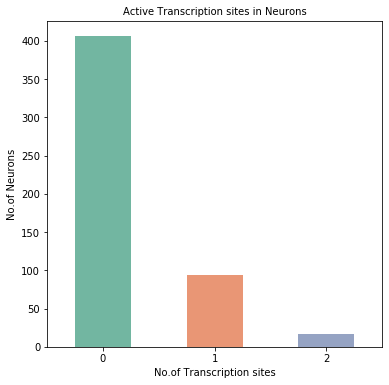

In [24]:
# Result image 3 is a swarm plot for the number of active transcription sites in neurons  

# Concatinating the data in 2 excel sheets of selected columns of 4, 5, 6
data1= pd.read_excel("__FQ_batch_summary_ALL_200728.xlsx", sheet_name = 0, header=5, usecols=[4,5,6])
data2= pd.read_excel("__FQ_batch_summary_ALL_190925 Control nascent and mature.xlsx", sheet_name = 0, header=5,usecols=[4,5,6])
data=pd.concat([data1,data2])
print(data)

# Parsing through each rows of the data for number of transcription site and sum the values that are more than zero.
data["sites"] = (data['TS1_Nascent']>0.0)*1.0+(data['TS2_Nascent']>0.0)*1.0
print(data["sites"])

# writing a for loop to count the number of occurences of TS (0,1,2) in neurons
nTS=[nTS0, nTS1, nTS2]        # creating a list called nTS (number of transcription site)
nTS0=nTS1=nTS2=0              # initializing the nTS list members with a value zero

for i in data["sites"]:       # for loop to iterate over the data['sites'] and increasing the count on encountering an occurence 
    if i==0:
        nTS0+=1
    elif i==1:
        nTS1+=1
    elif i==2:
        nTS2+=1
print(nTS)
count=[0,1,2]                # for x-axis

# Assigning a figure size 
fig,ax = plt.subplots(figsize=(6,6))

# Creating a bar plot using seaborn
plot= sns.barplot(x=count, y=nTS, data=data, palette="Set2")


# Setting the title and x-y label
plt.title("Active Transcription sites in Neurons", fontsize=10)
plt.xlabel("No.of Transcription sites", fontsize=10)
plt.ylabel("No.of Neurons", fontsize=10)

# Setting xtick labels
ax.set_xticklabels(['0','1','2'], fontsize=10)

# Setting the size of the bars
for patch in plot.patches :
    new_val=0.5
    current_width = patch.get_width()
    diff = current_width - new_val

    # Changing the width of the bar
    patch.set_width(new_val)

    # Recentering the bar
    patch.set_x(patch.get_x() + diff * .5)

# Figure visualization and storage
plt.savefig("F3_Active Transcription sites in Neurons.png", dpi=600, bbox_inches = 'tight')
plt.show()

   Cell type  Nascent TS       exp1       exp2
0       MEFS           0   0.000000   0.000000
1       MEFS          10  23.333333  17.241379
2       MEFS          20  23.333333  34.482759
3       MEFS          30  20.000000  27.586207
4       MEFS          40  20.000000   3.448276
5       MEFS          50  10.000000   3.000000
6       MEFS          60   3.333333   0.000000
7       MEFS          70   2.000000   6.896552
8       MEFS          80   1.000000   3.448276
9       MEFS          90   0.000000   0.000000
10      MEFS         100   0.000000   6.896552
11  NEURONS            0  65.957447  98.404255
12  NEURONS           10  23.404255   1.489362
13  NEURONS           20   4.255319   0.106383
14  NEURONS           30   2.127660   0.000000
15  NEURONS           40   2.127660   0.000000
16  NEURONS           50   1.063830   0.000000
17  NEURONS           60   0.000000   0.000000
18  NEURONS           70   1.063830   0.000000
19  NEURONS           80   0.000000   0.000000
20  NEURONS  

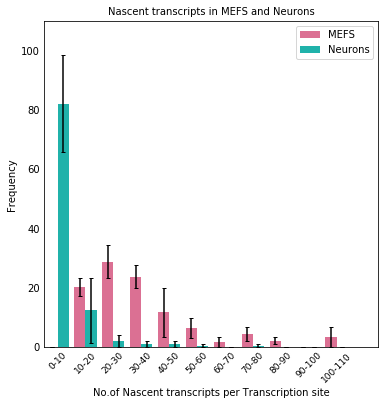

In [25]:
# Reading the data from excel file named 'Frequencies' and using the columns 0 through 3, loading first sheet

# Result image 4 is a barplot using seaborn for comparing the "Nascent transcription sites" in MEFS and Neurons
data=pd.read_excel("Frequencies.xlsx", sheet_name = 0, header=2, usecols=[0,1,2,3])
print(data)

# Computing mean for the data from 2 experiments and standard deviation for the error bars
data["mean"]=(data['exp1']+data['exp2'])/2
error=np.std([data['exp1']*1,data['exp2']*1],axis=0)

# Build the plot
fig, ax = plt.subplots(figsize=(6,6))    # setting up figure size
width=4                                  # defining width of the bars

# Creating a grouped bar plot with error bars 
p1=ax.bar(data['Nascent TS'][0:11]*1-4/2,data["mean"][0:11]*1, width=width, yerr=error[0:11], color='palevioletred', ecolor='black', align='center', capsize=2)
p2=ax.bar(data['Nascent TS'][11:]*1+4/2,data["mean"][11:]*1, width=width, yerr=error[11:], color='lightseagreen', ecolor='black', align='center', capsize=2)

# Setting up x-y labels and legends  
ax.set_ylabel('Frequency', fontsize=10)             
ax.set_xlabel('No.of Nascent transcripts per Transcription site', fontsize=10)
plt.legend((p1[0], p2[0]), ('MEFS', 'Neurons'), fontsize=10)

# Setting up x-y ticks and ticklabels
ax.set_xticks(data['Nascent TS']*1)
ax.set_xticklabels(['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '100-110'], fontsize=9, rotation=45)

for tick in ax.yaxis.get_major_ticks():    # for loop to increase the fontsize of ytick labels to 14.
    tick.label.set_fontsize(10)
ax.tick_params(direction='in', length=0, width=0)

# Setting up the title, x-y limits
ax.set_title('Nascent transcripts in MEFS and Neurons', fontsize=10)
ax.set_xlim([-5,115])
ax.set_ylim([0,110])

# Figure visualization and storage
plt.savefig('F4_Nascent Transcription sites.png', dpi=600, bbox_inches = 'tight')
plt.show()

   Cell type  Mature mRNA        exp1       exp2
0       MEFS            0    0.000000   0.000000
1       MEFS          250   11.764706   9.090909
2       MEFS          500   15.882353  27.272727
3       MEFS          750   11.764706   9.090909
4       MEFS         1000   29.411765  27.272727
5       MEFS         1250   29.411765  27.272727
6       MEFS         1500   11.764706   5.000000
7       MEFS         1750    0.000000   0.000000
8   NEURONS             0  100.000000  69.574468
9   NEURONS           250    0.000000  29.787234
10  NEURONS           500    0.000000   0.638298
11  NEURONS           750    0.000000   0.000000
12  NEURONS          1000    0.000000   0.000000
13  NEURONS          1250    0.000000   0.000000
14  NEURONS          1500    0.000000   0.000000
15  NEURONS          1750    0.000000   0.000000


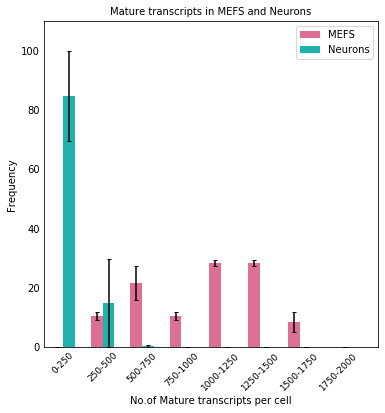

In [26]:
# Result image 5 is a barplot using seaborn for comparing the "Mature transcription sites" in MEFS and Neurons

# Reading the data from excel file named 'Frequencies' and using the column 5 through 8, loading first sheet
data=pd.read_excel("Frequencies.xlsx", sheet_name = 1, header=2, usecols=[5,6,7,8])
print(data)

# Computing mean for the data from 2 experiments and standard deviation for the error bars
data["mean"]=(data['exp1']+data['exp2'])/2
error=np.std([data['exp1']*1,data['exp2']*1],axis=0)

# Build the plot
fig, ax = plt.subplots(figsize=(6,6))    # setting up figure size                             
width=74                                # defining width of the bars

# Creating a grouped bar plot with error bars             
p1=ax.bar(data['Mature mRNA'][0:7]*1-100/2+12.5,data["mean"][0:7]*1, width=width, yerr=error[0:7], color='palevioletred', ecolor='black',align='center', capsize=2)
p2=ax.bar(data['Mature mRNA'][7:]*1+100/2-12.5,data["mean"][7:]*1, width=width, yerr=error[7:], color='lightseagreen', ecolor='black',align='center', capsize=2)
ax.set_ylabel('Frequency', fontsize=10)

# Setting up x labels
ax.set_xlabel('No.of Mature transcripts per cell', fontsize=10)

# Setting the x-y ticks and ticklabels
ax.set_xticks((data['Mature mRNA']*1))
ax.set_xticklabels(['0-250', '250-500', '500-750', '750-1000', '1000-1250', '1250-1500', '1500-1750', '1750-2000'], fontsize=9, rotation=45)

ax.tick_params(direction='in', length=0, width=0)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)

# Setting the legend, title and x-y limits 
plt.legend((p1[0], p2[0]), ('MEFS', 'Neurons'), fontsize=10)
ax.set_title('Mature transcripts in MEFS and Neurons', fontsize=10)
ax.set_xlim([-125,1750+250])
ax.set_ylim([0,110])

# Saving the figure in the given name and image quality
plt.savefig("F5_Mature Transcription sites.png", dpi=600, bbox_inches = 'tight')
plt.show()

In [ ]:
"""
References

1) McKinney, W. (2010). Data Structures for Statistical Computing in Python. 56–61. https://doi.org/10.25080/Majora-92bf1922-00a
2) Caswell, T. A., Droettboom, M., Hunter, J., Lee, A., Firing, E., Stansby, D., Klymak, J., Andrade, E. S. D., Nielsen, J. H., Varoquaux, N., Hoffmann, T., Root, B., Elson, P., May, R., Dale, D., Jae-Joon Lee, Seppänen, J. K., McDougall, D., Straw, A., … Ernest, E. (2019). matplotlib/matplotlib: REL: v3.1.1 (Version v3.1.1) [Computer software]. Zenodo. https://doi.org/10.5281/ZENODO.3264781
3) Waskom, M., Botvinnik, O., O’Kane, D., Hobson, P., Lukauskas, S., Gemperline, D. C., Augspurger, T., Halchenko, Y., Cole, J. B., Warmenhoven, J., Ruiter, J. D., Pye, C., Hoyer, S., Vanderplas, J., Villalba, S., Kunter, G., Quintero, E., Bachant, P., Martin, M., … Qalieh, A. (2017). Mwaskom/Seaborn: V0.8.1 (September 2017). Zenodo. https://doi.org/10.5281/ZENODO.883859
4) Reback, J., McKinney, W., Jbrockmendel, Bossche, J. V. D., Augspurger, T., Cloud, P., Gfyoung, Sinhrks, Klein, A., Hawkins, S., Roeschke, M., Tratner, J., She, C., Ayd, W., Terji Petersen, MomIsBestFriend, Garcia, M., Schendel, J., Hayden, A., … Winkel, M. (2020). pandas-dev/pandas: Pandas 1.1.0 (Version v1.1.0) [Computer software]. Zenodo. https://doi.org/10.5281/ZENODO.3509134

"""